In [1]:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import sklearn as skl
import scipy
import sys
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pylab as pl
import seaborn as sns
from datetime import date

In [3]:
data = pd.read_csv('train.csv', parse_dates=["date"])

In [4]:
print("Amount absent values 'ftemp': %.3f" % (len(data[data.ftemp == '-']) / len(data) * 100), '%')
data.head()

Amount absent values 'ftemp': 25.138 %


,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,humidity,wind_speed,casual,subscribed,usage
0,2011-01-03,0,0,1,1,1,0.22,0.19699999999999998,0.44,0.3582,0,15,15
1,2011-01-03,1,0,1,1,1,0.20,0.1667,0.44,0.4179,0,6,6
2,2011-01-03,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,3,3
3,2011-01-03,5,0,1,1,1,0.16,0.1364,0.47,0.2836,0,9,9
4,2011-01-03,6,0,1,1,1,0.14,-,0.50,0.3881,0,90,90


In [5]:
known_ftemp = data[data.ftemp != '-']
medium_diff = np.mean(known_ftemp.temp - known_ftemp.ftemp.astype(float))
medium_diff

0.02095721286370588

In [6]:
data.loc[data.ftemp == '-', 'ftemp'] = (data.temp - medium_diff).astype(np.float)

In [7]:
data.dtypes

date            datetime64[ns]
hour                     int64
holiday                  int64
workingday               int64
weekday                  int64
weather_type             int64
temp                   float64
ftemp                   object
humidity               float64
wind_speed             float64
casual                   int64
subscribed               int64
usage                    int64
dtype: object

In [8]:
data.corr()

,hour,holiday,workingday,weekday,weather_type,temp,humidity,wind_speed,casual,subscribed,usage
hour,1.000000,0.000468,0.002209,-0.003679,-0.029682,0.131916,-0.271771,0.127540,0.028011,0.371302,0.098023
holiday,0.000468,1.000000,-0.247877,-0.094536,-0.013434,-0.008131,0.006655,-0.019608,0.002130,-0.041417,-0.005842
workingday,0.002209,-0.247877,1.000000,0.036898,0.057356,0.053103,0.025730,-0.004804,-0.015372,0.134013,0.010684
weekday,-0.003679,-0.094536,0.036898,1.000000,0.000816,0.000837,-0.043147,0.025951,-0.000206,0.015390,0.002738
weather_type,-0.029682,-0.013434,0.057356,0.000816,1.000000,-0.083150,0.417010,0.044447,-0.015864,-0.131915,-0.040555
temp,0.131916,-0.008131,0.053103,0.000837,-0.083150,1.000000,-0.032506,-0.035742,0.040763,0.332923,0.103055
humidity,-0.271771,0.006655,0.025730,-0.043147,0.417010,-0.032506,1.000000,-0.282958,-0.036357,-0.268173,-0.086425
wind_speed,0.127540,-0.019608,-0.004804,0.025951,0.044447,-0.035742,-0.282958,1.000000,0.010544,0.080219,0.025531
casual,0.028011,0.002130,-0.015372,-0.000206,-0.015864,0.040763,-0.036357,0.010544,1.000000,0.065853,0.981693
subscribed,0.371302,-0.041417,0.134013,0.015390,-0.131915,0.332923,-0.268173,0.080219,0.065853,1.000000,0.254705


In [9]:
data.loc[(data["weekday"] == 5) | (data["weekday"] == 6), "holiday"] = 1
data

,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,humidity,wind_speed,casual,subscribed,usage
0,2011-01-03,0,0,1,1,1,0.22,0.19699999999999998,0.44,0.3582,0,15,15
1,2011-01-03,1,0,1,1,1,0.20,0.1667,0.44,0.4179,0,6,6
2,2011-01-03,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,3,3
3,2011-01-03,5,0,1,1,1,0.16,0.1364,0.47,0.2836,0,9,9
4,2011-01-03,6,0,1,1,1,0.14,0.119043,0.50,0.3881,0,90,90
5,2011-01-03,7,0,1,1,1,0.14,0.119043,0.50,0.1940,4,189,193
6,2011-01-03,8,0,1,1,1,0.14,0.1212,0.50,0.2836,4,459,463
7,2011-01-03,9,0,1,1,1,0.16,0.139043,0.43,0.3881,28,243,271
8,2011-01-03,10,0,1,1,1,0.18,0.1667,0.43,0.2537,44,99,143
9,2011-01-03,11,0,1,1,1,0.20,0.179043,0.40,0.3284,40,123,163


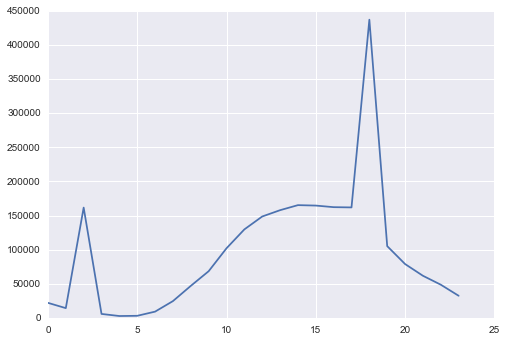

In [10]:
sums = []
for a in range(0, 24):
    sums.append(data.casual[data['hour'] == a].sum())
plt.plot(sums)

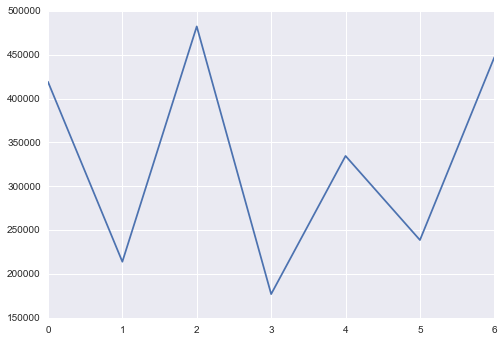

In [11]:
sums = []
for a in range(0, 7):
    sums.append(data.casual[data['weekday'] == a].sum())
plt.plot(sums)

In [12]:
# sums = []
# for a in range(0, 1):
#     sums.append(data.casual[data["ftemp"].astype(np.float) == a].sum())
# plt.plot(sums)

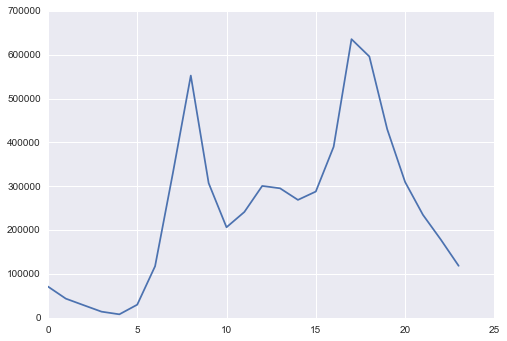

In [13]:
sums = []
for a in range(0, 24):
    sums.append(data.subscribed[data['hour'] == a].sum())
plt.plot(sums)

In [14]:
data.describe()

,hour,holiday,workingday,weekday,weather_type,temp,humidity,wind_speed,casual,subscribed,usage
count,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000
mean,11.549297,0.310379,0.686564,2.999159,1.426857,0.496512,0.629281,0.191745,176.771706,458.437328,635.209034
std,6.912769,0.462666,0.463908,1.998490,0.642158,0.194709,0.196462,0.124337,2303.968546,453.807016,2377.376342
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,6.000000,0.000000,0.000000,1.000000,1.000000,0.340000,0.470000,0.104500,16.000000,102.000000,123.000000
50%,12.000000,0.000000,1.000000,3.000000,1.000000,0.500000,0.630000,0.194000,64.000000,342.000000,445.500000
75%,18.000000,1.000000,1.000000,5.000000,2.000000,0.660000,0.790000,0.283600,192.000000,660.000000,898.000000
max,23.000000,1.000000,1.000000,6.000000,4.000000,1.000000,1.000000,0.850700,151915.000000,2658.000000,153967.000000


In [15]:
from sklearn.preprocessing import MinMaxScaler

date_scaler = MinMaxScaler()
data.date = date_scaler.fit_transform(data.date.astype(np.int64)[:,np.newaxis])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
data.head()

,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,humidity,wind_speed,casual,subscribed,usage
0,0.0,0,0,1,1,1,0.22,0.19699999999999998,0.44,0.3582,0,15,15
1,0.0,1,0,1,1,1,0.20,0.1667,0.44,0.4179,0,6,6
2,0.0,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,3,3
3,0.0,5,0,1,1,1,0.16,0.1364,0.47,0.2836,0,9,9
4,0.0,6,0,1,1,1,0.14,0.119043,0.50,0.3881,0,90,90


# Regression for subscribed

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import grid_search
from sklearn.cross_validation import train_test_split

data_test_set = data

data_test_set = data_test_set.drop(['workingday', 'casual', 'subscribed', 'usage'], 1)
X_train, X_test, y_train, y_test = train_test_split(data_test_set, data.subscribed)

y_train_subsribed = y_train
y_test_subscribed = y_test

parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3]}]
clf_grid = grid_search.GridSearchCV(KNeighborsRegressor(), parameters, n_jobs=-1)
clf_grid.fit(X_train, y_train_subsribed)
predictions = clf_grid.predict(X_test)

print("Opitimal neigbour: ", clf_grid.best_estimator_.n_neighbors)
print("Opitimal p: ", clf_grid.best_estimator_.p)
print("Opitimal weights: ", clf_grid.best_estimator_.weights)
print("Best score: ", clf_grid.best_score_)

KeyboardInterrupt: 

In [27]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import grid_search
from sklearn import ensemble

data_test_set = data

data_test_set = data_test_set.drop(['workingday', 'casual', 'subscribed', 'usage'], 1)
X_train, X_test, y_train, y_test = train_test_split(data_test_set, data.subscribed)

y_train_subsribed = y_train
y_test_subscribed = y_test

# subscribed_regression1 = KNeighborsRegressor(n_neighbors=5, p=1, weights='distance', n_jobs=-1)
subscribed_regression1 = ensemble.RandomForestRegressor(n_estimators=1000)
subscribed_regression1.fit(X_train, y_train_subsribed)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [28]:
y_predicted1 = subscribed_regression1.predict(X_test)
print("Error for subscribed: ", mean_absolute_error(y_test_subscribed, y_predicted1))
print("R2: ", r2_score(y_test_subscribed, y_predicted1))
print("Negative el: ", len(y_predicted1[y_predicted1 < 0]))

Error for subscribed:  65.0117701009
R2:  0.944813643644
Negative el:  0


# Regression for casual

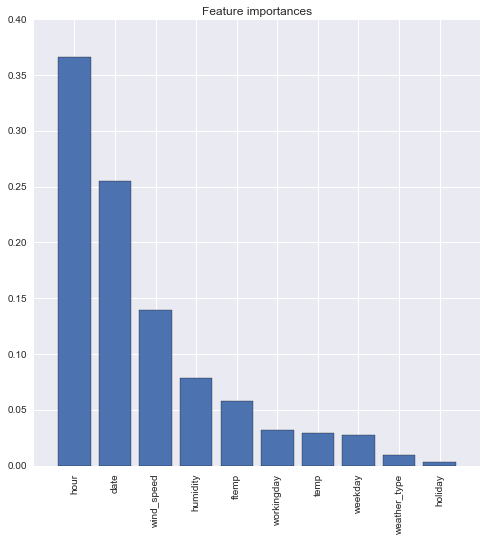

In [31]:
d_first = 10
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [35]:
y_predicted2 = casual_regression2.predict(X_test)
print("Error for casual: ", mean_absolute_error(y_test_casual, y_predicted2))
print("R2: ", r2_score(y_test_casual, y_predicted2))
print("Negative el: ", len(y_predicted2[y_predicted2 < 0]))

Error for casual:  130.8811647
R2:  0.00216688095438
Negative el:  63


# Metrics

In [45]:
y_final = y_predicted1 + y_predicted2
a = np.array(y_test_casual) + np.array(y_test_subscribed)
np.mean(abs(a - y_final))

153.47587343320083

# Testing

In [39]:
test_data = pd.read_csv('test.csv', parse_dates=["date"])

test_data_scaler = MinMaxScaler()
test_data.date = test_data_scaler.fit_transform(test_data.date.astype(np.int64)[:,np.newaxis])
test_data.loc[test_data.ftemp == '-', 'ftemp'] = test_data.temp - medium_diff

data_index = test_data.Id.values
data_x = test_data.drop(['Id'], 1)

answers_subscribed = subscribed_regression1.predict(data_x.drop('workingday', 1))

# answers_casual = casual_regression2.predict(data_x.drop(['date', 'holiday', 'weekday', 'ftemp'], 1))
answers_casual = rf.predict(data_x)
answers = answers_subscribed + answers_casual

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
answers = answers.astype(int)

# Save to CSV

In [41]:
import csv
with open('submission.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(("Id", "Expected"))
        for i in range(0, len(data_x)):
            writer.writerow((data_index[i], answers[i]))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble

data_test_set = data

data_test_set = data_test_set.drop(['casual', 'subscribed', 'usage'], 1)
X_train, X_test, y_train, y_test = train_test_split(data_test_set[['hour', 'date', 'wind_speed']], data.casual)

# X_train = np.transpose(np.atleast_2d(X_train))
# X_test = np.transpose(np.atleast_2d(X_test))

y_train_casual = y_train
y_test_casual = y_test

# casual_regression2 = KNeighborsRegressor(n_jobs=-1)
# casual_regression2.fit(X_train, y_train_casual)

# rf = ensemble.RandomForestRegressor(n_estimators=1000)
# # rf = GradientBoostingRegressor(n_estimators=2)
# rf.fit(X_train, y_train_casual)


# y_predicted2 = casual_regression2.predict(X_test)

# importances = rf.feature_importances_
# indices = np.argsort(importances)[::-1]
# feature_names = X_test.columns

# print("Feature importances:")
# for f, idx in enumerate(indices):
#     print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3]}]
clf_grid = grid_search.GridSearchCV(KNeighborsRegressor(), parameters, n_jobs=-1)
clf_grid.fit(X_train, y_train_casual)
predictions = clf_grid.predict(X_test)

print("Opitimal neigbour: ", clf_grid.best_estimator_.n_neighbors)
print("Opitimal p: ", clf_grid.best_estimator_.p)
print("Opitimal weights: ", clf_grid.best_estimator_.weights)
print("Best score: ", clf_grid.best_score_)
    
# print("Error for casual: ", mean_absolute_error(y_test_casual, y_predicted2))
# print("R2: ", r2_score(y_test_casual, y_predicted2))
# print("Negative el: ", len(y_predicted2[y_predicted2 < 0]))